In [1]:
import os 
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
from skimage import io
from matplotlib import pyplot as plt
from matplotlib.patheffects import withStroke
from tqdm import tqdm
from PIL import Image

from utils.utils import read_csv
from measurements.measurements import get_function_dict

In [ ]:
def plot_image(image, kpts1, kpts2, labels=None, sizes=None, alpha=0.5):

    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    plt.imshow(image, cmap='gray')
        
    # Draw landmarks
    ax.scatter(kpts1[:, 1], kpts1[:, 0], c='green', s=sizes, alpha=alpha)
    ax.scatter(kpts2[:, 1], kpts2[:, 0], c='red', s=sizes, alpha=alpha)

    # Draw connections
    for kpt1, kpt2 in zip(kpts1, kpts2):
        ax.plot([kpt1[1], kpt2[1]], [kpt1[0], kpt2[0]], 'k-', alpha=0.5)

    # Draw labels
    if labels is None:
        labels = [str(i+1) for i in range(len(kpts1))]
    for landmark, label in zip(kpts1, labels):
        plt.text(landmark[1], landmark[0], label[0])

    plt.xlim([-20, 532])
    plt.ylim([532, -20])
    plt.tight_layout()
    plt.axis('off')

In [3]:
def plot_overlay(image, landmarks, labels=None, sizes=None, colors=None, alpha=0.5):

    fig, ax = plt.subplots(figsize=[10,10])
    plt.imshow(image, cmap='gray')
        
    ax_scat = ax.scatter(landmarks[:, 1], landmarks[:, 0], c=colors, s=sizes, alpha=alpha)

    # Define the text with a black outline
    outline_effect = withStroke(linewidth=2, foreground='black')

    if not labels is None:
        for landmark, label in zip(landmarks, labels):
            plt.text(landmark[1], landmark[0], label[0], color='white', path_effects=[outline_effect])



def plot_colorbar(cmap_name='viridis', ticks=[0,1], ticklabels=['bad', 'good']):

    # Create a figure and a blank subplot (dummy axes) for the colorbar
    fig, ax = plt.subplots(figsize=(0.2, 10)) 
    cmap = plt.get_cmap(cmap_name)  
    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    # Create a ScalarMappable object with the colormap and normalization
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Empty array for the ScalarMappable

    # Plot the colorbar in the dummy subplot
    cbar = plt.colorbar(sm, cax=ax, orientation="vertical")
    cbar.set_ticks(ticks)                
    cbar.set_ticklabels(ticklabels) 
    #cbar.set_ticklabels(["", ""]) 

    plt.text(
        -1.05, 0.5, 'Mean Distance', va='center', ha='center', rotation=90,
        transform=plt.gca().transAxes, fontsize=12
    )

    plt.show()


def plot_circles(num_circles=5, circle_radius=50, labels=['1.00cm', '0.90cm']):

    # Define the number of circles and their sizes
    circle_sizes = [circle_radius * (i + 1) for i in reversed(range(num_circles))]  # Decreasing size

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(5, 10))

    # Set the axis limits to accommodate the circles
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, num_circles + 1)

    # Plot circles in a vertical row with increasing size
    for i, size in enumerate(circle_sizes):
        ax.scatter(0, i + 1, s=size, color='black', edgecolor='black')

    # Add labels to the top and bottom circles
    ax.text(0.2, 1, labels[0], va='center', ha='left', fontsize=10)
    ax.text(0.2, num_circles, labels[1], va='center', ha='left', fontsize=10)
    ax.text(-0.5, (num_circles+1)/2, 'Spread', va='center', ha='left', fontsize=12, rotation=90)

    # Remove axis for cleaner appearance
    ax.axis('off')
    ax.set_aspect('equal')

    # Adjust layout to reduce whitespace
    #plt.subplots_adjust(left=0.3, right=0.7, top=0.9, bottom=0.1)

    plt.tight_layout()
    plt.show()

In [26]:
def calculate_icc(kpts_rater1, kpts_rater2):

    data = np.stack([kpts_rater1, kpts_rater2], axis=1)
    print(data.shape)

    n_landmarks, n_raters, _ = data.shape
    mean_landmarks = np.mean(data, axis=1)  # (n_landmarks, 2)
    mean_total = np.mean(data)  # Single value (overall mean)
    
    SSW = np.sum((data - mean_landmarks[:, np.newaxis, :])**2) / (n_landmarks * (n_raters - 1))
    SSB = np.sum((mean_landmarks - mean_total)**2) / (n_landmarks - 1)
    
    icc = SSB / (SSB + SSW)
    return icc

# Load files and save overlay results

In [4]:
measure_functions, kpt_names = get_function_dict(mode='thorax_pa')

annot_kpt_files1 = glob.glob(r'D:\data\ChestX-ray14_fullsize\preprocessed\*\landmarks_Alex\*.csv')
annot_kpt_files2 = glob.glob(r'D:\data\ChestX-ray14_fullsize\preprocessed\*\landmarks_Alex_double\*.csv')
annot_kpt_files3 = glob.glob(r'D:\data\ChestX-ray14_fullsize\preprocessed\*\landmarks_Alex_double2\*.csv')
annot_kpt_files4 = glob.glob(r'D:\data\ChestX-ray14_fullsize\preprocessed\*\landmarks_Nikol\*.csv')

image_files = glob.glob(r'D:\data\ChestX-ray14_fullsize\preprocessed\*\images\*.png')

save_dir = r'D:\experiments\MSK_Landmarks\ChestX14_intra_rater'
os.makedirs(save_dir, exist_ok=True)

print('Found {0}, {1}, {2} and {3} annotations.'.format(len(annot_kpt_files1), len(annot_kpt_files2), len(annot_kpt_files3), len(annot_kpt_files4)))
print('Found {0} images.'.format(len(image_files)))

Found 115, 20, 20 and 20 annotations.
Found 112120 images.


 10%|█         | 2/20 [00:01<00:10,  1.65it/s]

(81, 2, 2)
(81, 2, 2)


 20%|██        | 4/20 [00:01<00:04,  3.23it/s]

(81, 2, 2)
(81, 2, 2)


 30%|███       | 6/20 [00:02<00:03,  4.54it/s]

(81, 2, 2)
(81, 2, 2)


 40%|████      | 8/20 [00:02<00:02,  5.25it/s]

(81, 2, 2)
(81, 2, 2)


 50%|█████     | 10/20 [00:02<00:02,  4.32it/s]

(81, 2, 2)
(81, 2, 2)


 60%|██████    | 12/20 [00:03<00:01,  5.20it/s]

(81, 2, 2)
(81, 2, 2)


 65%|██████▌   | 13/20 [00:03<00:01,  5.52it/s]

(81, 2, 2)


 75%|███████▌  | 15/20 [00:03<00:00,  5.33it/s]

(81, 2, 2)
(81, 2, 2)


 85%|████████▌ | 17/20 [00:04<00:00,  5.66it/s]

(81, 2, 2)
(81, 2, 2)


 95%|█████████▌| 19/20 [00:04<00:00,  6.11it/s]

(81, 2, 2)
(81, 2, 2)


100%|██████████| 20/20 [00:04<00:00,  4.33it/s]


(81, 2, 2)
[0.9924740605726122, 0.9935250047620229, 0.9916193205005945, 0.9919906970726701, 0.9925069373325603, 0.9942383917835307, 0.9922624831486985, 0.9939016970315993, 0.9901706532489165, 0.9944778601515253, 0.9946655015049004, 0.9933674468084543, 0.9912424344332917, 0.9808351508076697, 0.9925235829390028, 0.9895132951580949, 0.9938238429258401, 0.9935885331723624, 0.996497663370598, 0.9935696990975674]
Average ICC between raters: 0.99


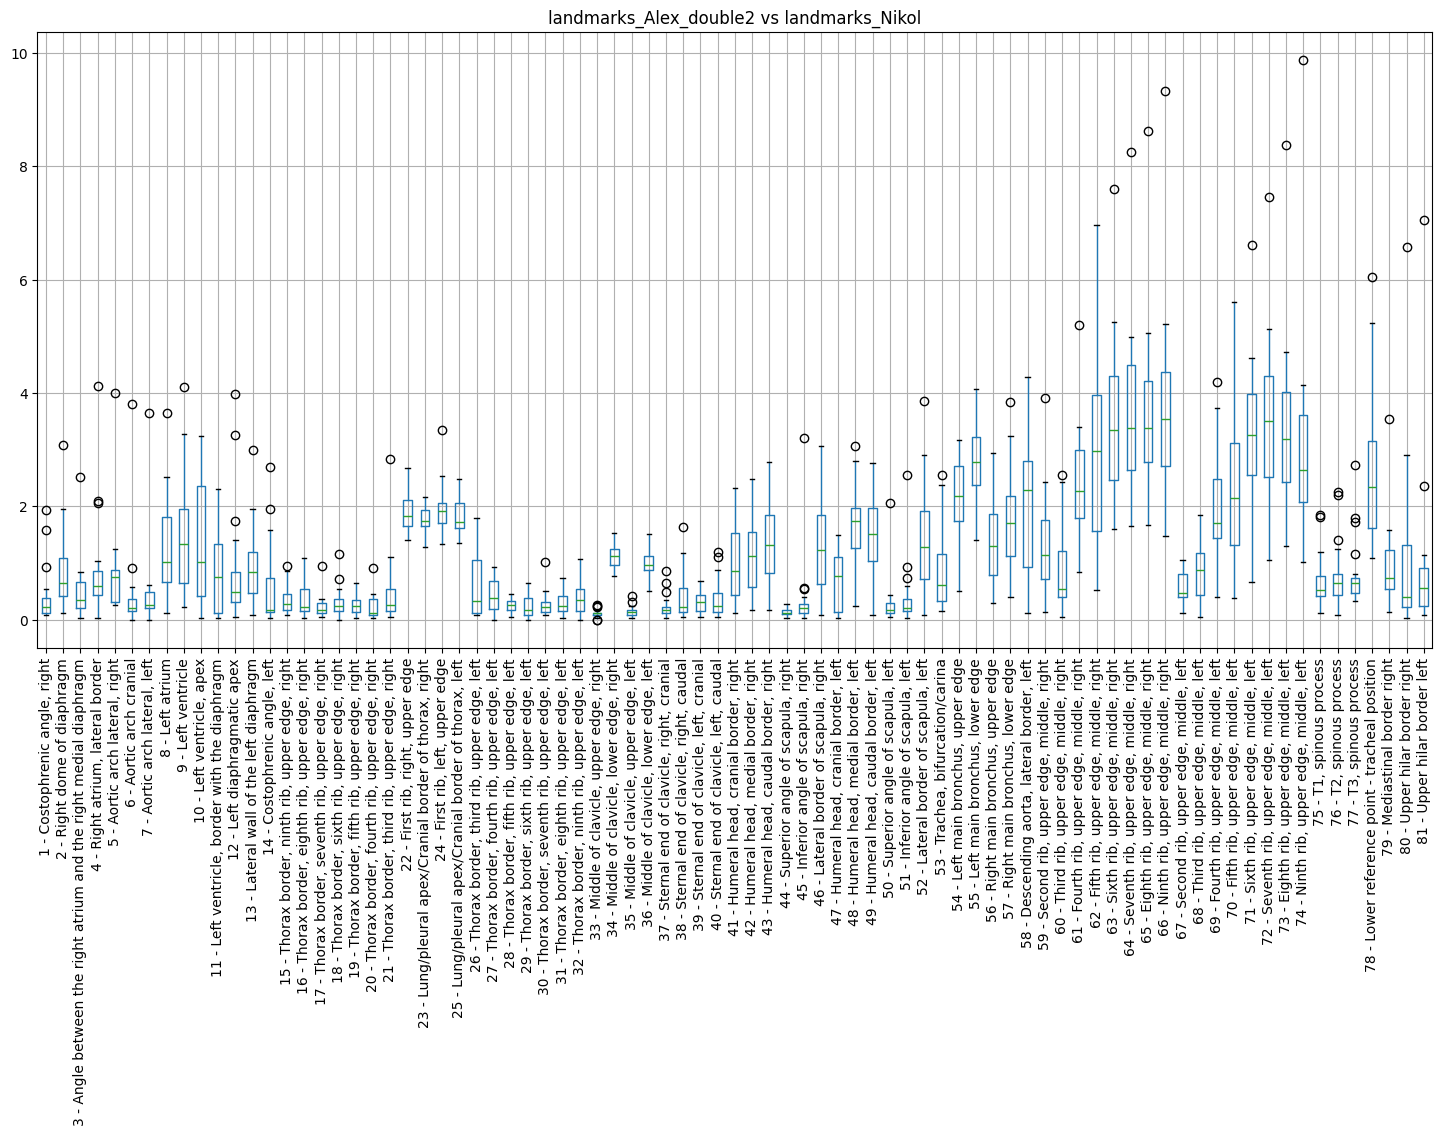

In [27]:
kpt_files1 = annot_kpt_files3
kpt_files2 = annot_kpt_files4

mpp = 0.04
distance_dict = {}
iccs = []

for label in kpt_names:
    distance_dict[' - '.join(label)] = []

for kpt_file1 in tqdm(kpt_files1):

    file_id = os.path.split(kpt_file1)[-1].replace('_landmarks.csv','')
    
    save_file = os.path.join(save_dir, file_id+'.png')

    #if os.path.exists(save_file):
    #    continue

    # File identification
    kpt_file1 = [f for f in kpt_files1 if file_id in f]
    if len(kpt_file1)==0: 
        print(f'Keypoint file for source {file_id} not found.')
        continue    
    kpt_file1 = kpt_file1[0]

    kpt_file2 = [f for f in kpt_files2 if file_id in f]
    if len(kpt_file2)==0: 
        print(f'Keypoint file for source {file_id} not found.')
        continue
    kpt_file2 = kpt_file2[0]

    img_file = [f for f in image_files if file_id in f]
    if len(img_file)==0: raise FileNotFoundError(f'Image file for target {file_id} not found.')
    img_file = img_file[0]


    # File loading
    annot_kpts1 = read_csv(kpt_file1)
    annot_kpts1 = np.array([[float(y)*2,float(x)*2] for x,y in annot_kpts1])

    annot_kpts2 = read_csv(kpt_file2)
    annot_kpts2 = np.array([[float(y),float(x)] for x,y in annot_kpts2])

    img = Image.open(img_file)
    img = img.resize((512, 512))
    img = np.array(img)

    # Save visualization
    plot_image(img, annot_kpts1, annot_kpts2, labels=kpt_names)
    plt.savefig(save_file, bbox_inches="tight", pad_inches=0)
    plt.close()


    # Compute distances
    dists = np.linalg.norm(annot_kpts1-annot_kpts2, axis=1)
    for d, label in zip(dists, kpt_names):
        distance_dict[' - '.join(label)].append(d*mpp)
    
    icc = calculate_icc(annot_kpts1*mpp, annot_kpts2*mpp)
    iccs.append(icc)

print(iccs)
print('Average ICC between raters: {0:.2f}'.format(np.mean(iccs)))

# Plot results
dist_dataframe = pd.DataFrame(distance_dict)
dist_dataframe.boxplot(rot=90, fontsize=10, figsize=[18,8])
#plt.ylim([-5,105])
#plt.yticks([0, 25, 50, 100], rotation=90)
plt.title('{0} vs {1}'.format(kpt_files1[0].split(os.sep)[-2], kpt_files2[0].split(os.sep)[-2]))
plt.show()

In [17]:
# Perform analysis on the global-level
distances_all = [value for sublist in distance_dict.values() for value in sublist]
distances_all_mean = np.mean(distances_all)
distances_all_std = np.std(distances_all)
print(r"Total number of landmarks: {0} with a distance of {1:.2f} +/- {2:.2f}".format(len(distances_all), distances_all_mean, distances_all_std))

# Perform analysis on the label-level
distances_mean = [np.nanmean(distance_dict[key]) for key in distance_dict.keys()]
distances_std = [np.nanstd(distance_dict[key]) for key in distance_dict.keys()]
kpt_fail = [np.sum(np.isnan(distance_dict[key])) for key in distance_dict.keys()]
print("Number of files: {0}".format(len(distance_dict[list(distance_dict.keys())[0]])))

dist_dict = {'Labels':[k[1] for k in kpt_names], 'Mean':distances_mean, 'Variance':distances_std, 'Fail':kpt_fail}
dist_df = pd.DataFrame(dist_dict)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dist_df

Total number of landmarks: 1620 with a distance of 0.26 +/- 0.38
Number of files: 20


,Labels,Mean,Variance,Fail
0,"Costophrenic angle, right",0.129590,0.172529,0
1,Right dome of diaphragm,0.305349,0.367100,0
2,Angle between the right atrium and the right m...,0.135264,0.250966,0
3,"Right atrium, lateral border",0.193457,0.304786,0
4,"Aortic arch lateral, right",0.205874,0.363340,0
5,Aortic arch cranial,0.189923,0.369553,0
6,"Aortic arch lateral, left",0.174041,0.368714,0
7,Left atrium,0.477524,0.440148,0
8,Left ventricle,0.442509,0.482935,0
9,"Left ventricle, apex",0.227610,0.234166,0


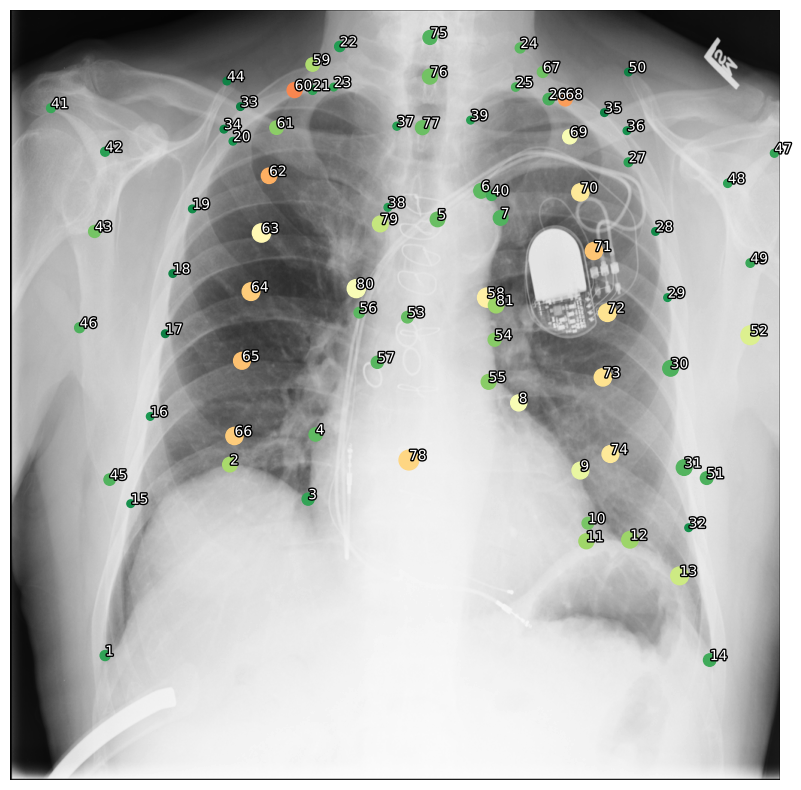

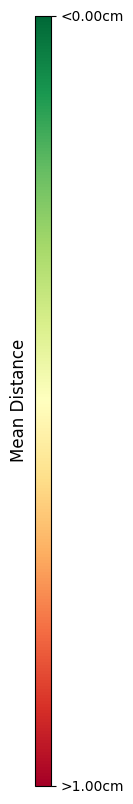

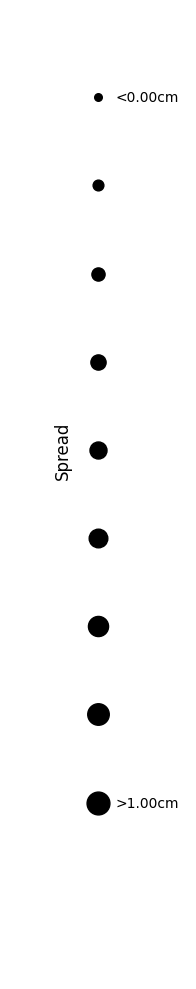

In [16]:
representative_image_file = r'D:\data\ChestX-ray14_fullsize\preprocessed\images_001\images\00000007_000.png'
representative_landmark_file = r'D:\data\ChestX-ray14_fullsize\preprocessed\images_001\landmarks_Alex_corrected_Eneko\00000007_000_landmarks.csv'
circle_diameter = 300
cmap_name = 'RdYlGn'
dist_range = np.array([0.0, 1.0]) #FussLateral np.array([0.1, 0.5])
variance_range = np.array([0.0, 1.0]) #FussLateral np.array([0.0, 0.25])
landmark_scaling = (1,1)

# Get data
representative_image = io.imread(representative_image_file)
representative_landmarks = read_csv(representative_landmark_file)
representative_landmarks = np.array([[float(y)*landmark_scaling[0],float(x)*landmark_scaling[1]] for x,y in representative_landmarks])

# Plot color-coded mean distances and size-coded spreads
if dist_range is None:
    dist_range = np.percentile(distances_mean, [5,95])

error = (distances_mean-dist_range[0]) / (dist_range[1]-dist_range[0])
error = np.clip(error, 0, 1)
cmap = plt.get_cmap(cmap_name)
accuracy_colors = cmap(1-error)

variance_sizes = (distances_std-variance_range[0]) / (variance_range[1]-variance_range[0])
variance_sizes = np.clip(variance_sizes, 0.1, 1.1)
variance_sizes = np.array([d*circle_diameter for d in variance_sizes])

plot_overlay(representative_image, representative_landmarks, labels=kpt_names, sizes=variance_sizes, colors=accuracy_colors, alpha=1.0)
plt.axis('off')
plt.show()
plot_colorbar(cmap_name=cmap_name, ticks=[0,1], ticklabels=['>{0:.2f}cm'.format(dist_range[1]), '<{0:.2f}cm'.format(dist_range[0])])
plot_circles(num_circles=9, circle_radius=30, labels=['>{0:.2f}cm'.format(variance_range[1]), '<{0:.2f}cm'.format(variance_range[0])])

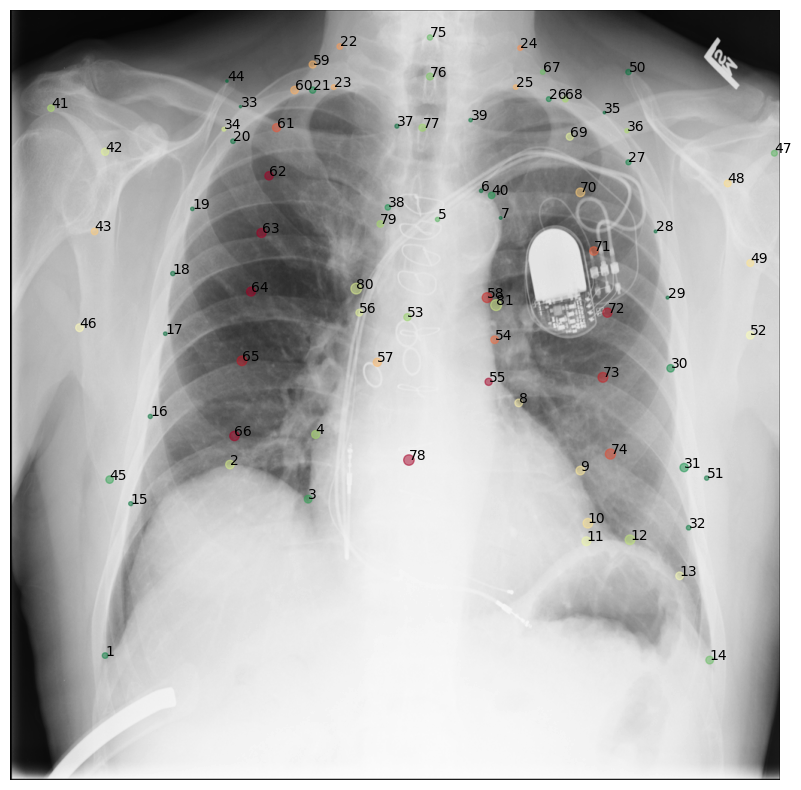

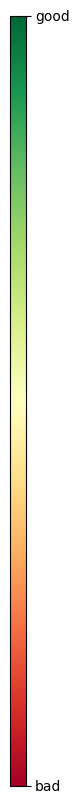

In [ ]:
#representative_image_file = r'D:\data\DennisFeetX\annotated_AP_Eneko\Left\19\19_SER_0000.jpg'
#representative_landmark_file = r'D:\data\DennisFeetX\annotated_AP_Eneko\Left\19\19_landmarks.csv'
#circle_diameter = 200
#cmap_name = 'RdYlGn'
#dist_range = np.array([0.2, 1.0])
#landmark_scaling = (1,1)

representative_image_file = r'D:\data\ChestX-ray14_fullsize\preprocessed\images_001\images\00000007_000.png'
representative_landmark_file = r'D:\data\ChestX-ray14_fullsize\preprocessed\images_001\landmarks_Alex_corrected_Eneko\00000007_000_landmarks.csv'
circle_diameter = 300
cmap_name = 'RdYlGn'
dist_range = np.array([0.5, 3.0]) #FussLateral np.array([0.1, 0.5])
variance_range = np.array([0.5, 1.5]) #FussLateral np.array([0.0, 0.25])
landmark_scaling = (1,1)

# Get data
representative_image = io.imread(representative_image_file)
representative_landmarks = read_csv(representative_landmark_file)
representative_landmarks = np.array([[float(y)*landmark_scaling[0],float(x)*landmark_scaling[1]] for x,y in representative_landmarks])

# Plot color-coded mean distances and size-coded spreads
if dist_range is None:
    dist_range = np.percentile(distances_mean, [5,95])
error = (distances_mean-dist_range[0]) / (dist_range[1]-dist_range[0])
error = np.clip(error, 0, 1)
cmap = plt.get_cmap(cmap_name)
accuracy_colors = cmap(1-error)
variance_sizes = np.array([d*circle_diameter for d in distances_std])

plot_overlay(representative_image, representative_landmarks, labels=kpt_names, sizes=variance_sizes, colors=accuracy_colors, alpha=0.5)
plt.axis('off')
plt.show()
plot_colorbar(cmap_name=cmap_name)



